## [ 웹크롤링 _ 나무위키 사이트 분석 및 시각화 ]

### <Step1. 크롤링> : 크롤링으로 웹 데이터 가져오기

[웹크롤링 라이브러리 사용하기]
- 파이썬에서는 BeautifulSoup과 requests라는 라이브러리로 웹 크롤러를 만들 수 있음
- requests는 특정 URL로부터 HTML 문서를 가져오는 작업을 수행
- 나무위키와 같은 페이지는 HTML 문서가 Javascript로 동적 로딩되는 경우가 있음
- requests 대신 셀레니움(selenium) 라이브러리를 이용해 크롬 브라우저로 동적 웹크롤링 수행
- selenium은 웹 브라우저를 자동으로 구동해주는 라이브러리
- selenium을 사용하기 위해 크롬 드라이버를 이용해 크롬 브라우저 자동으로 구동=> 크롬드라이버 필요

### [BeautifulSoup과 selenium을 이용한 웹 크롤링]
- anaconda prompt 혹은 Terminal에서 아래와 같은 패키지들을 설치
- (env_name) pip install selenium
- (env_name) pip install beautifulsoup4

### [크롬 브라우저 업데이트 및 크롬 드라이버 설치]
- 크롬 브라우저 설정에서 최신 버전으로 업데이트
- 크롬 드라이버 사이트에서 브라우저 버전에 맞는 드라이버 다운로드
  - https://chromedriver.chromium.org/downloads
- chromedriver.exe 파일을 노트북 파일 경로에 이동

In [1]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### [ BeautifulSoup의 select() VS find_all() ]
- HTML의 특정 요소 선택
- select, select_one 의 경우 CSS 선택자를 이용하는 것처럼 사용 가능
- select의 경우 후손이나 자손 요소를 CSS 처럼 선택 가능
- 예) soup.select("dl > dt > a") 
- find_all, find 의 경우 하나의 태그(name="table")나 하나의 클래스(class="tables")를 선택
- find의 경우 후손이나 자손 요소를 직접 선택할 수 없어 한번 더 변수에 담든지 루프 문을 이용해야 함
- 예) find_all(class="ah_roll"), find(name="table")

In [2]:
from selenium import webdriver
from bs4 import BeautifulSoup
import re # 정규식 표현을 위한 모듈

# 윈도우용 크롬 웹드라이버 실행 경로 (Windows) 지정
excutable_path = "../chromedriver.exe"
driver = webdriver.Chrome(executable_path=excutable_path)

# 사이트의 html 구조에 기반하여 크롤링을 수행
source_url = "https://namu.wiki/RecentChanges" # 크롤링할 사이트 주소를 정의
driver.get(source_url)  # 크롬 드라이버를 통해 URL의 HTML 문서 가져옴

import time
time.sleep(10)

req = driver.page_source
soup = BeautifulSoup(req, "html.parser") # BeautifulSoup의 soup 객체로 변환

table_rows = soup.select("table tbody tr")

In [3]:
req 

'<html><head><link href="/skins/senkawa/6.4cd8c9c215a8ec226109.css" rel="stylesheet"><link href="/skins/senkawa/3.6578e2190d7f10b0f082.css" rel="stylesheet"><script async="" src="/cdn-cgi/bm/cv/669835187/api.js"></script><style type="text/css">.resize-observer[data-v-b329ee4c]{position:absolute;top:0;left:0;z-index:-1;width:100%;height:100%;border:none;background-color:transparent;pointer-events:none;display:block;overflow:hidden;opacity:0}.resize-observer[data-v-b329ee4c] object{display:block;position:absolute;top:0;left:0;height:100%;width:100%;overflow:hidden;pointer-events:none;z-index:-1}</style><link rel="stylesheet" type="text/css" href="/skins/senkawa/10.a1e48eb86746983c527d.css"><script charset="utf-8" src="/skins/senkawa/10.a1e48eb86746983c527d.js"></script><title>최근 변경내역 - 나무위키</title><link data-n-head="1" rel="canonical" href="https://namu.wiki/RecentChanges"><link data-n-head="1" rel="search" type="application/opensearchdescription+xml" title="나무위키" href="/opensearch.xml">

In [4]:
soup

<html><head><link href="/skins/senkawa/6.4cd8c9c215a8ec226109.css" rel="stylesheet"/><link href="/skins/senkawa/3.6578e2190d7f10b0f082.css" rel="stylesheet"/><script async="" src="/cdn-cgi/bm/cv/669835187/api.js"></script><style type="text/css">.resize-observer[data-v-b329ee4c]{position:absolute;top:0;left:0;z-index:-1;width:100%;height:100%;border:none;background-color:transparent;pointer-events:none;display:block;overflow:hidden;opacity:0}.resize-observer[data-v-b329ee4c] object{display:block;position:absolute;top:0;left:0;height:100%;width:100%;overflow:hidden;pointer-events:none;z-index:-1}</style><link href="/skins/senkawa/10.a1e48eb86746983c527d.css" rel="stylesheet" type="text/css"/><script charset="utf-8" src="/skins/senkawa/10.a1e48eb86746983c527d.js"></script><title>최근 변경내역 - 나무위키</title><link data-n-head="1" href="https://namu.wiki/RecentChanges" rel="canonical"/><link data-n-head="1" href="/opensearch.xml" rel="search" title="나무위키" type="application/opensearchdescription+xm

In [5]:
table_rows

[<tr class="" data-v-17dde2e0=""><td data-v-17dde2e0=""><a data-v-17dde2e0="" href="/w/%EC%A0%9C20%EB%8C%80%20%EB%8C%80%ED%86%B5%EB%A0%B9%20%EC%84%A0%EA%B1%B0/%EC%97%AC%EB%A1%A0%EC%A1%B0%EC%82%AC/%ED%9B%84%EB%B3%B4%20%ED%99%95%EC%A0%95%20%ED%9B%84">제20대 대통령 선거/여론조사/후보 확정 후</a> <a data-v-17dde2e0="" href="/history/%EC%A0%9C20%EB%8C%80%20%EB%8C%80%ED%86%B5%EB%A0%B9%20%EC%84%A0%EA%B1%B0/%EC%97%AC%EB%A1%A0%EC%A1%B0%EC%82%AC/%ED%9B%84%EB%B3%B4%20%ED%99%95%EC%A0%95%20%ED%9B%84">[역사]</a> <a data-v-17dde2e0="" href="/diff/%EC%A0%9C20%EB%8C%80%20%EB%8C%80%ED%86%B5%EB%A0%B9%20%EC%84%A0%EA%B1%B0/%EC%97%AC%EB%A1%A0%EC%A1%B0%EC%82%AC/%ED%9B%84%EB%B3%B4%20%ED%99%95%EC%A0%95%20%ED%9B%84?rev=558&amp;oldrev=557">[비교]</a> <a data-v-17dde2e0="" href="/discuss/%EC%A0%9C20%EB%8C%80%20%EB%8C%80%ED%86%B5%EB%A0%B9%20%EC%84%A0%EA%B1%B0/%EC%97%AC%EB%A1%A0%EC%A1%B0%EC%82%AC/%ED%9B%84%EB%B3%B4%20%ED%99%95%EC%A0%95%20%ED%9B%84">[토론]</a> <span data-v-17dde2e0="">(<span class="SBT2YK7T" data-v-17dde2e0="" data-v-6cb

In [6]:
len(table_rows)

118

### [페이지 링크주소 리스트 가져오기]

In [7]:
page_url_base = "https://namu.wiki" # 베이스 URL 정의
page_urls = [] # href 속성값을 담기 위한 빈 리스트 생성 

for index in range(0, len(table_rows)):
    first_td = table_rows[index].find_all("td")[0]
    td_url = first_td.find_all("a")
    if len(td_url) > 0:
        # 특정 속성 선택시 attrs["속성명"] 또는 get("속성명") 사용
        # page_url = page_url_base + td_url[0].get("href")
        # attrs는 딕셔너리 형태로 속성명과 속성값을 불러옴
        # attrs["href"]는 attrs 결과 중 key가 href인 것의 값만 불러옴
        page_url = page_url_base + td_url[0].attrs["href"] 
        if "png" not in page_url:
            page_urls.append(page_url)
            print(page_urls)

['https://namu.wiki/w/%EC%A0%9C20%EB%8C%80%20%EB%8C%80%ED%86%B5%EB%A0%B9%20%EC%84%A0%EA%B1%B0/%EC%97%AC%EB%A1%A0%EC%A1%B0%EC%82%AC/%ED%9B%84%EB%B3%B4%20%ED%99%95%EC%A0%95%20%ED%9B%84']
['https://namu.wiki/w/%EC%A0%9C20%EB%8C%80%20%EB%8C%80%ED%86%B5%EB%A0%B9%20%EC%84%A0%EA%B1%B0/%EC%97%AC%EB%A1%A0%EC%A1%B0%EC%82%AC/%ED%9B%84%EB%B3%B4%20%ED%99%95%EC%A0%95%20%ED%9B%84', 'https://namu.wiki/w/Java']
['https://namu.wiki/w/%EC%A0%9C20%EB%8C%80%20%EB%8C%80%ED%86%B5%EB%A0%B9%20%EC%84%A0%EA%B1%B0/%EC%97%AC%EB%A1%A0%EC%A1%B0%EC%82%AC/%ED%9B%84%EB%B3%B4%20%ED%99%95%EC%A0%95%20%ED%9B%84', 'https://namu.wiki/w/Java', 'https://namu.wiki/w/%EB%A9%94%EC%86%8C%ED%8F%AC%ED%83%80%EB%AF%B8%EC%95%84%20%EB%AC%B8%EB%AA%85']
['https://namu.wiki/w/%EC%A0%9C20%EB%8C%80%20%EB%8C%80%ED%86%B5%EB%A0%B9%20%EC%84%A0%EA%B1%B0/%EC%97%AC%EB%A1%A0%EC%A1%B0%EC%82%AC/%ED%9B%84%EB%B3%B4%20%ED%99%95%EC%A0%95%20%ED%9B%84', 'https://namu.wiki/w/Java', 'https://namu.wiki/w/%EB%A9%94%EC%86%8C%ED%8F%AC%ED%83%80%EB%AF%B8%EC%95%84%2

In [8]:
td_url[0].attrs

{'data-v-17dde2e0': '',
 'href': '/w/%EC%BD%98%ED%81%AC%EB%A6%AC%ED%8A%B8%20%EC%A7%80%EB%8B%88'}

In [9]:
page_urls

['https://namu.wiki/w/%EC%A0%9C20%EB%8C%80%20%EB%8C%80%ED%86%B5%EB%A0%B9%20%EC%84%A0%EA%B1%B0/%EC%97%AC%EB%A1%A0%EC%A1%B0%EC%82%AC/%ED%9B%84%EB%B3%B4%20%ED%99%95%EC%A0%95%20%ED%9B%84',
 'https://namu.wiki/w/Java',
 'https://namu.wiki/w/%EB%A9%94%EC%86%8C%ED%8F%AC%ED%83%80%EB%AF%B8%EC%95%84%20%EB%AC%B8%EB%AA%85',
 'https://namu.wiki/w/%EB%AC%B4%20%EB%8C%80%EB%A5%99',
 'https://namu.wiki/w/%EC%B2%AD%EB%AA%85(%ED%99%94%EC%82%B0%EA%B7%80%ED%99%98)',
 'https://namu.wiki/w/1966%EB%85%84%20%EC%9B%94%EB%93%9C%20%EC%8B%9C%EB%A6%AC%EC%A6%88',
 'https://namu.wiki/w/%EC%95%88%EC%96%91%20%ED%94%BC%EB%8B%89%EC%8A%A4%20FC',
 'https://namu.wiki/w/%EC%9D%BC%EB%B3%B8%EB%B0%A9%EC%86%A1%ED%98%91%ED%9A%8C',
 'https://namu.wiki/w/Java',
 'https://namu.wiki/w/2022%20LoL%20Champions%20Korea%20Spring/%EC%98%81%EC%83%81%20%EB%B0%8F%20%EC%82%BD%EC%9E%85%EA%B3%A1',
 'https://namu.wiki/w/%EB%AA%AC%EC%8A%A4%ED%84%B0',
 'https://namu.wiki/w/%ED%95%B4%EA%B3%A8%20%EB%AC%B4%EB%8D%A4',
 'https://namu.wiki/w/%ED%8C%8C%EC

### [각 링크 페이지내 텍스트 구조를 확인하여 제목, 카테고리, 내용 출력]

In [10]:
# 윈도우용 크롬 웹드라이버 실행 경로 (Windows) 지정
excutable_path = "../chromedriver.exe"
driver = webdriver.Chrome(executable_path=excutable_path)
# 크롬 드라이버를 통해 page_urls[0]번째 사이트의 HTML 문서 가져옴
driver.get(page_urls[0])  # page_urls[0] 의 정보를 가져옴
req = driver.page_source # 페이지 소스를 req에 저장
soup = BeautifulSoup(req, 'html.parser') # html.parser로 파싱
contents_table = soup.find(name="article") #  불러온 소스에서 태그명이 article인 요소 하나만 추출

### 타이틀 추출
title = contents_table.find_all('h1')[0] # 태그명이 h1인 모든 태그 추출, article h1

### 카테고리 추출
category = contents_table.find_all('ul')[0]

### 내용 추출
#contents_table.find_all(name="div", attrs={"class":"wiki-paragraph"})  
#div  태그 중  class 속성값이  wiki-paragraph인 요소를 추출
content_paragraphs = contents_table.select("div.wiki-paragraph")  

#  내용으로 추출한 리스트를 하나의 문자열로 전처리
content_corpus_list = [] # 내용 중 텍스트만 담을 빈 리스트 생성
# content_paragraphs 리스트의 값을 순서대로 paragraphs에 대입
for paragraphs in content_paragraphs: # content_paragraphs 리스트의 값을 순서대로 paragraphs에 대입
    content_corpus_list.append(paragraphs.text)  # 가져온 결과 태그 중 텍스트만 추출하여 content_corpus_list에 추가
content_corpus =" ".join(content_corpus_list) #"텍스트".join(리스트명) => 리스트의 요소를 "텍스트"로 구분하여 하나의 문자열로 만듦

print(title.text) # 제목 출력
print("\n")
print(category.text) # 카테고리 출력
print("\n")
print(content_corpus) # 내용 출력

# 크롤링에 사용한 브라우저를 종료합니다.
driver.close()

제20대 대통령 선거/여론조사/후보 확정 후 


제20대 대통령 선거여론조사


   상위 문서: 제20대 대통령 선거/여론조사 제20대 대통령선거   후보 경선 (더불어민주당 후보 · 국민의힘 후보 · 정의당 후보) 대권 주자 (대선 캠프 · 후보 교체론) · 최종 후보 여론조사 후보 확정 전: 여론조사 (가상대결) 후보 확정 후: 여론조사 (비정기) · 출구조사 변수 변수 (지역별 · 정당별 · 세대별) · TV 토론회 결과 개표 결과 (지역별 · 정당별 · 세대별) · 결론 기타 타임라인 · 2022년 3월 재보궐선거 · 2022년 6월 지방선거 대한민국의 주요선거 1. 개요2. 편집지침3. 가상대결3.1. 정기 여론조사3.1.1. 지상파 3사 의뢰 조사3.1.1.1. KBS - 한국리서치3.1.1.2. MBC - 코리아리서치인터내셔널3.1.1.3. SBS - 넥스트리서치3.1.2. 종합편성채널 의뢰 조사3.1.2.1. JTBC - 글로벌리서치3.1.2.2. MBN - 알앤써치3.1.2.3. TV조선·조선일보 - 칸타코리아3.1.3. 한국갤럽3.1.3.1. 한국갤럽 자체 정기여론조사3.1.3.2. 머니투데이 의뢰 여론조사3.1.4. 리얼미터3.1.4.1. 오마이뉴스 의뢰 정기여론조사3.1.4.2. YTN 의뢰 여론조사3.1.5. NBS 전국지표조사3.1.6. KSOI3.1.7. PNR3.1.7.1. 뉴데일리 의뢰 여론조사3.1.7.2. 프라임경제신문/미래한국연구소 의뢰 정기 여론조사3.1.8. 여론조사공정3.1.9. 미디어토마토3.1.10. 리서치뷰3.1.11. 윈지코리아3.1.12. 한길리서치3.1.13. 조원씨앤아이3.1.14. 미디어리서치3.1.15. 아시아리서치앤컨설팅3.1.16. 서던포스트3.1.17. 코리아정보리서치3.2. 비정기 여론조사4. 대통령 국정 수행 평가5. 정권 유지론 vs 정권 교체론5.1. 2021년5.1.1. 11월5.1.2. 12월5.2. 2022년5.2.1. 1월 제20대 대통령 선거의 주요 정당[1]의 후보가 확정된 2

### [각각 링크 페이지를 크롤링하여 제목, 카테고리, 내용 출력]

In [11]:
# 크롤링한 데이터를 데이터 프레임으로 만들기 위해 준비
columns = ["title", "category", "content_text"]
df = pd.DataFrame(columns=columns)

#for page_url in page_urls:
for i in range(10):
    # 윈도우용 크롬 웹드라이버 실행 경로 (Windows) 지정
    excutable_path = "../chromedriver.exe"
    driver = webdriver.Chrome(executable_path=excutable_path)
    # 크롬 드라이버를 통해 page_urls[0]번째 사이트의 HTML 문서 가져옴
    #driver.get(page_url)  # page_urls[i],  page_url의 정보를 가져옴
    driver.get(page_urls[i])  # page_urls[i],  page_url의 정보를 가져옴
    req = driver.page_source # 페이지 소스를 req에 저장
    soup = BeautifulSoup(req, 'html.parser') # html.parser로 파싱
    contents_table = soup.find(name="article") #  불러온 소스에서 태그명이 article인 요소 하나만 추출

    ### 타이틀 추출
    title = contents_table.find_all('h1')[0] # 태그명이 h1인 모든 태그 추출, article h1
    if title is not None:
        row_title = title.text.replace("\n", " ")
    else:
        row_title = ""
        
    ### 카테고리 추출
    # 카테고리 정보가 없는 경우를 확인합니다.
    if len(contents_table.find_all("ul")) > 0: # article ul 로 검색한 결과 여러 ul 결과가 나올 경우
        category = contents_table.find_all("ul")[0] # 제일 첫번째 article ul 을 category로 설정
    else:
        category = None
        
    if category is not None:
        row_category = category.text.replace("\n", " ")
    else:
        row_category = ""

    ### 내용 추출
    #contents_table.find_all(name="div", attrs={"class":"wiki-paragraph"})  
    #div  태그 중  class 속성값이  wiki-paragraph인 요소를 추출
    content_paragraphs = contents_table.select("div.wiki-paragraph")  
    #  내용으로 추출한 리스트를 하나의 문자열로 전처리
    content_corpus_list = [] # 내용 중 텍스트만 담을 빈 리스트 생성
    
    # content_paragraphs 리스트의 값을 순서대로 paragraphs에 대입
    if content_paragraphs is not None:
        for paragraphs in content_paragraphs:
            if paragraphs is not None:
                content_corpus_list.append(paragraphs.text.replace("\n", " "))
            else:
                content_corpus_list.append("")
    else:
        content_corpus_list.append("")

    # 모든 정보를 하나의 데이터 프레임에 저장하기 위해서 시리즈 생성
    # 각 페이지의 정보를 추출하여 제목, 카테고리, 내용 순으로 행을 생성
    row = [row_title, row_category, "".join(content_corpus_list)]
    # 시리즈로 만듦
    series = pd.Series(row, index=df.columns)
    # 데이터 프레임에 시리즈를 추가, 한 페이지 당 하나의 행 추가
    df = df.append(series, ignore_index=True)
    
    # 크롤링에 사용한 브라우저를 종료합니다.
    #driver.close()
df

,title,category,content_text
0,제20대 대통령 선거/여론조사/후보 확정 후,제20대 대통령 선거여론조사,상위 문서: 제20대 대통령 선거/여론조사제20대 대통령선거후보경선 (더불어민...
1,Java,Java,은(는) 여기로 연결됩니다. 동음이의어에 대한 내용은 자바 문서를의 번 문단을...
2,메소포타미아 문명,이라크의 역사이라크의 지리아시아의 지명,세계 4대 문명이집트메소포타미아인더스황하메소포타미아 문명의 역사تاریخ تمدن ...
3,무 대륙,미스터리유사역사학,지구의 대륙과 지역 [ 펼치기 · 접기 ]지질학적 구분지리학적 구분문화적 구분아프로...
4,청명(화산귀환),화산귀환/등장인물,등장인물 · 설정 · 무공 · 웹툰靑明청명본명청명(靑明) 초삼(草三)도호-나이15세...
5,1966년 월드 시리즈,월드 시리즈볼티모어 오리올스로스앤젤레스 다저스,역대 월드 시리즈 목록 [ 펼치기 · 접기 ]1903190419051906190...
6,안양 피닉스 FC,대한민국의 아마추어 축구단K6리그안양시 연고 구단2001년 창단,K6리그2021 시즌 참가 구단K6리그2021 시즌 참가 구단 [ 펼치기 · 접기...
7,일본방송협회,NHK,은(는) 여기로 연결됩니다. NHK라는 이름을 가진 다른 뜻에 대한 내용은 N...
8,Java,Java,은(는) 여기로 연결됩니다. 동음이의어에 대한 내용은 자바 문서를의 번 문단을...
9,2022 LoL Champions Korea Spring/영상 및 삽입곡,2022 LoL Champions Korea Spring,상위 문서: 2022 LoL Champions Korea Spring1. 삽입...


###  [명사만을 추출하여 워드 클라우드 그리기]
### [코엔엘파이(konply)를 이용한 형태소 분석]

- 품사란 단어를 기능, 형태, 의미에 따라 나눈갈래
- 우리나라의 학교 문법에서는 명사, 대명사, 수사, 조사, 동사, 형용사, 관형사, 부사, 감탄사의 아홉 가지로 분류

### [형태소 분석과 품사태깅]
- 형태소 : 더 이상 분리를 할 수 없는 의미를 갖는 최소 단어를 의미
- 형태소 분석 : 형태소를 비롯하여, 어근, 접두사/접미사/ 품사(POS, part-of-speech)등 다양한 언어적 속성의 구조를 파악하는 것
- 품사 태깅 : 행태소와 품사를 매칭시키는 것

### [빈도 분석: 문장 형태소 분석 - KoNLPy]
- KoNLPy : 파이썬 한국어 형태소 분석 라이브러리

### <Step2. 추출> : 키워드 추출
### [텍스트 데이터 전처리] 정규식을 사용하여 한글과 띄어쓰기만 가져오기
### 파이썬 정규표현식(re)사용법 - 05 . 주석, 치환, 분리
- 정규표현식: 컴파일 => re.complile , 컴파일을 미리 해두고 이를 저장
- 정규표현식: 치환    => re.sub(pattern, repl, string, count, flags)

In [74]:
# 한글 코드 범위
# ㄱ ~ ㅎ : 0x3131 ~ 0x314e
# ㅏ ~ ㅣ : 0x314f ~ 0x3163
# 가 ~ 힣 : 0xac00 ~ 0xd7a3
# [^ ㄱ-ㅣ 가-힣] 한글과 띄어쓰기의 정규식 패턴
# 사용자 정의 함수 선언
def text_cleaning(text):
    # 한글과 띄어쓰기를 제외한 모든 글자 패턴을 지정하여 hangul로 정의
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]+')
    result = hangul.sub('', text) # 한글과 띄어쓰기를 제외한 모든 글자 패턴을 '' 빈 문자로 치환
    return result
def hangul_cleaning(text):
    nohangul = re.compile('[ ㄱ-ㅣ 가-힣]+')
    result2 = nohangul.sub(' ', text) # 한글과 띄어쓰기를 포함한 모든 글자 패턴을 '' 빈 문자로 치환
    return result2

In [13]:
df['title'][0]

'제20대 대통령 선거/여론조사/후보 확정 후 '

In [14]:
print(text_cleaning(df['title'][0]))

제대 대통령 선거여론조사후보 확정 후 


In [15]:
print(text_cleaning(df['category'][0]))

제대 대통령 선거여론조사


In [16]:
df['content_text'][0]

' \xa0 상위 문서: 제20대 대통령 선거/여론조사제20대 대통령선거후보경선 (더불어민주당 후보 · 국민의힘 후보 · 정의당 후보)대권 주자 (대선 캠프 · 후보 교체론) · 최종 후보여론조사후보 확정 전: 여론조사 (가상대결)후보 확정 후: 여론조사 (비정기) · 출구조사변수변수 (지역별 · 정당별 · 세대별) · TV 토론회결과개표 결과 (지역별 · 정당별 · 세대별) · 결론기타타임라인 · 2022년 3월 재보궐선거 · 2022년 6월 지방선거대한민국의 주요선거1. 개요2. 편집지침3. 가상대결3.1. 정기 여론조사3.1.1. 지상파 3사 의뢰 조사3.1.1.1. KBS - 한국리서치3.1.1.2. MBC - 코리아리서치인터내셔널3.1.1.3. SBS - 넥스트리서치3.1.2. 종합편성채널 의뢰 조사3.1.2.1. JTBC - 글로벌리서치3.1.2.2. MBN - 알앤써치3.1.2.3. TV조선·조선일보 - 칸타코리아3.1.3. 한국갤럽3.1.3.1. 한국갤럽 자체 정기여론조사3.1.3.2. 머니투데이 의뢰 여론조사3.1.4. 리얼미터3.1.4.1. 오마이뉴스 의뢰 정기여론조사3.1.4.2. YTN 의뢰 여론조사3.1.5. NBS 전국지표조사3.1.6. KSOI3.1.7. PNR3.1.7.1. 뉴데일리 의뢰 여론조사3.1.7.2. 프라임경제신문/미래한국연구소 의뢰 여론조사3.1.8. 여론조사공정3.1.9. 미디어토마토3.1.10. 리서치뷰3.1.11. 윈지코리아3.1.12. 한길리서치3.1.13. 조원씨앤아이3.1.14. 미디어리서치3.1.15. 아시아리서치앤컨설팅3.1.16. 서던포스트3.1.17. 코리아정보리서치3.2. 비정기 여론조사4. 대통령 국정 수행 평가5. 정권 유지론 vs 정권 교체론5.1. 2021년5.1.1. 11월5.1.2. 12월5.2. 2022년5.2.1. 1월제20대 대통령 선거의 주요 정당[1]의 후보가 확정된 2021년 11월 5일 이후부터 조사되는 여론조사를 모아둔 문서이다.중앙선거관리위원회의 지침에 따라, 선거와 직간접

In [17]:
print(text_cleaning(df['content_text'][0]))

  상위 문서 제대 대통령 선거여론조사제대 대통령선거후보경선 더불어민주당 후보  국민의힘 후보  정의당 후보대권 주자 대선 캠프  후보 교체론  최종 후보여론조사후보 확정 전 여론조사 가상대결후보 확정 후 여론조사 비정기  출구조사변수변수 지역별  정당별  세대별   토론회결과개표 결과 지역별  정당별  세대별  결론기타타임라인  년 월 재보궐선거  년 월 지방선거대한민국의 주요선거 개요 편집지침 가상대결 정기 여론조사 지상파 사 의뢰 조사   한국리서치   코리아리서치인터내셔널   넥스트리서치 종합편성채널 의뢰 조사   글로벌리서치   알앤써치 조선조선일보  칸타코리아 한국갤럽 한국갤럽 자체 정기여론조사 머니투데이 의뢰 여론조사 리얼미터 오마이뉴스 의뢰 정기여론조사  의뢰 여론조사  전국지표조사   뉴데일리 의뢰 여론조사 프라임경제신문미래한국연구소 의뢰 여론조사 여론조사공정 미디어토마토 리서치뷰 윈지코리아 한길리서치 조원씨앤아이 미디어리서치 아시아리서치앤컨설팅 서던포스트 코리아정보리서치 비정기 여론조사 대통령 국정 수행 평가 정권 유지론  정권 교체론 년 월 월 년 월제대 대통령 선거의 주요 정당의 후보가 확정된 년 월 일 이후부터 조사되는 여론조사를 모아둔 문서이다중앙선거관리위원회의 지침에 따라 선거와 직간접적으로 관련이 있는 여론조사 결과를 인용할 시 다음의 사항이 포함되어야 합니다 조사의뢰자 조사기관 조사일시 중앙선거여론조사심의위원회 홈페이지를 참조하라는 문구이 중 하나라도 포함되지 않을 시 공직선거법 등의 법령 위반으로 만원 이하의 과태료 년 이하의 징역 또는 만원 이하의 벌금형에 처해질 수 있습니다특히 각 인터넷 사이트의 게시물에 번 문구를 생략하는 경우가 속출하여 각 지방 선관위에서 각 인터넷 커뮤니티로 여론조사를 인용한 글을 삭제해 달라는 협조요청 공문을 발송하고 있으니 본 문서의 매 단락에 포함된 해당 문구를 삭제하는 행위를 삼가시기 바랍니다예시  등록된 여론조사 현황은 중앙선거여론조사심의위원회에서 확인할 수 있다또한 본 문서에 기재한 여론조사

In [18]:
print(hangul_cleaning(df['content_text'][0]))

 :20/20(··)(·)·:():()·(··)·TV(··)··20223·202261.2.3.3.1.3.1.1.33.1.1.1.KBS-3.1.1.2.MBC-3.1.1.3.SBS-3.1.2.3.1.2.1.JTBC-3.1.2.2.MBN-3.1.2.3.TV·-3.1.3.3.1.3.1.3.1.3.2.3.1.4.3.1.4.1.3.1.4.2.YTN3.1.5.NBS3.1.6.KSOI3.1.7.PNR3.1.7.1.3.1.7.2./3.1.8.3.1.9.3.1.10.3.1.11.3.1.12.3.1.13.3.1.14.3.1.15.3.1.16.3.1.17.3.2.4.5.vs5.1.20215.1.1.115.1.2.125.2.20225.2.1.120[1]2021115.,.1.2.3.4."",[2]300,2400.4,.:.,..(,2).2021111[5][5][±3.1%P]#28.6%34.6%4.4%4.8%0.5%27.2%2021112[5][8][±3.1%P]#35.5%35.5%4.4%3.5%0.4%20.8%2021121[5][11][±3.1%P]#33.7%34.2%4.8%4.8%1.0%21.5%2021122[5][14][±3.1%P]#39.3%27.3%3.2%8.1%0.5%21.6%202211[5][17][±3.1%P]#39.1%26.0%3.1%10.6%0.6%20.4%202212[4][20][±3.1%P]#34.5%33.0%3.0%12.9%-17.6%[3][23][±3.1%P]#38.0%42.1%4.5%--15.4%31.0%-2.6%48.5%-17.9%.2021111[4][27][±3.1%P]#32.2%39.5%4.8%5.5%18.0%[][30][±3.1%P]#38.3%44.3%--17.4%2021112[4][33][±3.1%P]#32.7%35.7%4.1%6.0%21.4%[][36][±3.1%P]#38.3%43.9%--17.8%2021121[4][39][±3.1%P]#34.5%38.7%4.5%5.9%16.4%[][42][±3.1%P]#40.0%44.0%--16.0%2021122[4]

In [19]:
# 각 피처마다 데이터 전처리를 적용
df['title'] = df['title'].apply(lambda x: text_cleaning(x))
df['category'] = df['category'].apply(lambda x: text_cleaning(x))
df['content_text'] = df['content_text'].apply(lambda x: text_cleaning(x))
df.head(10)

,title,category,content_text
0,제대 대통령 선거여론조사후보 확정 후,제대 대통령 선거여론조사,상위 문서 제대 대통령 선거여론조사제대 대통령선거후보경선 더불어민주당 후보 국...
1,,,은는 여기로 연결됩니다 동음이의어에 대한 내용은 자바 문서를의 번 문단을의 부...
2,메소포타미아 문명,이라크의 역사이라크의 지리아시아의 지명,세계 대 문명이집트메소포타미아인더스황하메소포타미아 문명의 역사 펼치기 접기...
3,무 대륙,미스터리유사역사학,지구의 대륙과 지역 펼치기 접기 지질학적 구분지리학적 구분문화적 구분아프로유라시...
4,청명화산귀환,화산귀환등장인물,등장인물 설정 무공 웹툰청명본명청명 초삼도호나이세화 세화 세화 세화신체자...
5,년 월드 시리즈,월드 시리즈볼티모어 오리올스로스앤젤레스 다저스,역대 월드 시리즈 목록 펼치기 접기 역대 월드 시리즈 일람년 월드 시리즈년 ...
6,안양 피닉스,대한민국의 아마추어 축구단리그안양시 연고 구단년 창단,리그 시즌 참가 구단리그 시즌 참가 구단 펼치기 접기 강원 조강릉주문진 ...
7,일본방송협회,,은는 여기로 연결됩니다 라는 이름을 가진 다른 뜻에 대한 내용은 동음이의어 문서...
8,,,은는 여기로 연결됩니다 동음이의어에 대한 내용은 자바 문서를의 번 문단을의 부...
9,영상 및 삽입곡,,상위 문서 삽입곡 영상 타이틀 스프링 스플릿 인트로 베스트 모먼트 ...


In [20]:
df['title'].tolist()

['제대 대통령 선거여론조사후보 확정 후 ',
 ' ',
 '메소포타미아 문명 ',
 '무 대륙 ',
 '청명화산귀환 ',
 '년 월드 시리즈 ',
 '안양 피닉스  ',
 '일본방송협회 ',
 ' ',
 '    영상 및 삽입곡 ']

In [21]:
# 각 피처마다 말뭉치를 생성
title_corpus = "".join(df['title'].tolist())
category_corpus = "".join(df['category'].tolist())
content_corpus = "".join(df['content_text'].tolist())
print(title_corpus)
print(category_corpus)

제대 대통령 선거여론조사후보 확정 후  메소포타미아 문명 무 대륙 청명화산귀환 년 월드 시리즈 안양 피닉스  일본방송협회      영상 및 삽입곡 
제대 대통령 선거여론조사이라크의 역사이라크의 지리아시아의 지명미스터리유사역사학화산귀환등장인물월드 시리즈볼티모어 오리올스로스앤젤레스 다저스대한민국의 아마추어 축구단리그안양시 연고 구단년 창단    


In [22]:
import warnings
warnings.simplefilter("ignore")

import konlpy
konlpy.__version__

'0.6.0'

In [23]:
content_corpus

'  상위 문서 제대 대통령 선거여론조사제대 대통령선거후보경선 더불어민주당 후보  국민의힘 후보  정의당 후보대권 주자 대선 캠프  후보 교체론  최종 후보여론조사후보 확정 전 여론조사 가상대결후보 확정 후 여론조사 비정기  출구조사변수변수 지역별  정당별  세대별   토론회결과개표 결과 지역별  정당별  세대별  결론기타타임라인  년 월 재보궐선거  년 월 지방선거대한민국의 주요선거 개요 편집지침 가상대결 정기 여론조사 지상파 사 의뢰 조사   한국리서치   코리아리서치인터내셔널   넥스트리서치 종합편성채널 의뢰 조사   글로벌리서치   알앤써치 조선조선일보  칸타코리아 한국갤럽 한국갤럽 자체 정기여론조사 머니투데이 의뢰 여론조사 리얼미터 오마이뉴스 의뢰 정기여론조사  의뢰 여론조사  전국지표조사   뉴데일리 의뢰 여론조사 프라임경제신문미래한국연구소 의뢰 여론조사 여론조사공정 미디어토마토 리서치뷰 윈지코리아 한길리서치 조원씨앤아이 미디어리서치 아시아리서치앤컨설팅 서던포스트 코리아정보리서치 비정기 여론조사 대통령 국정 수행 평가 정권 유지론  정권 교체론 년 월 월 년 월제대 대통령 선거의 주요 정당의 후보가 확정된 년 월 일 이후부터 조사되는 여론조사를 모아둔 문서이다중앙선거관리위원회의 지침에 따라 선거와 직간접적으로 관련이 있는 여론조사 결과를 인용할 시 다음의 사항이 포함되어야 합니다 조사의뢰자 조사기관 조사일시 중앙선거여론조사심의위원회 홈페이지를 참조하라는 문구이 중 하나라도 포함되지 않을 시 공직선거법 등의 법령 위반으로 만원 이하의 과태료 년 이하의 징역 또는 만원 이하의 벌금형에 처해질 수 있습니다특히 각 인터넷 사이트의 게시물에 번 문구를 생략하는 경우가 속출하여 각 지방 선관위에서 각 인터넷 커뮤니티로 여론조사를 인용한 글을 삭제해 달라는 협조요청 공문을 발송하고 있으니 본 문서의 매 단락에 포함된 해당 문구를 삭제하는 행위를 삼가시기 바랍니다예시  등록된 여론조사 현황은 중앙선거여론조사심의위원회에서 확인할 수 있다또한 본 문서에 기재한 여론조

In [24]:
from konlpy.tag import Okt
from collections import Counter

nouns_tagger = Okt()
nouns = nouns_tagger.nouns(content_corpus)
count = Counter(nouns)

In [25]:
count

Counter({'상위': 32,
         '문서': 124,
         '제대': 10,
         '대통령': 13,
         '선거': 73,
         '여론조사': 98,
         '대통령선거': 1,
         '후보': 14,
         '경선': 1,
         '민주당': 1,
         '국민': 6,
         '힘': 9,
         '정의당': 1,
         '대권': 1,
         '주자': 139,
         '대선': 1,
         '캠프': 1,
         '교체': 11,
         '론': 14,
         '최종': 6,
         '확정': 6,
         '전': 39,
         '가상': 10,
         '대결': 6,
         '후': 46,
         '비': 19,
         '정기': 6,
         '출구조사': 1,
         '변수': 6,
         '지역별': 4,
         '정당': 5,
         '별': 6,
         '대별': 2,
         '토론회': 1,
         '결과': 36,
         '개표': 1,
         '결론': 6,
         '기타': 69,
         '타임': 3,
         '라인': 4,
         '년': 1592,
         '월': 1497,
         '재보궐선거': 3,
         '지방선거': 1,
         '대한민국': 4,
         '개요': 31,
         '편집지침': 1,
         '지상파': 15,
         '사': 35,
         '의뢰': 18,
         '조사': 135,
         '한국': 60,
         '리서치': 41,


### [키워드 가다듬기]

In [26]:
# 한글자 키워드를 제거
remove_char_counter = Counter({x: count[x] for x in count if len(x) > 1})
print(remove_char_counter)

Counter({'청명': 344, '화산': 236, '문단': 168, '방송': 162, '언어': 153, '주자': 139, '조사': 135, '문서': 124, '역사': 123, '제국': 122, '이전': 121, '지원': 116, '때문': 112, '방송국': 107, '내용': 104, '여론조사': 98, '사용': 96, '부분': 94, '대한': 88, '이후': 82, '개발': 81, '왕조': 80, '버전': 75, '홈페이지': 74, '선거': 73, '참고': 72, '추가': 70, '기타': 69, '하나': 67, '정도': 67, '제자': 67, '자바': 66, '제공': 64, '다른': 62, '아시리아': 62, '사람': 61, '라디오': 61, '한국': 60, '프로그래밍': 60, '오라클': 60, '가장': 59, '대륙': 59, '일본': 59, '중앙': 58, '위원회': 57, '프로그램': 57, '모습': 57, '주차': 53, '해당': 52, '자신': 51, '심의': 50, '지역': 50, '수신료': 50, '매화': 49, '발표': 48, '시작': 47, '자체': 46, '또한': 46, '양자': 46, '이름': 46, '광주': 46, '사실': 45, '평가': 44, '무당': 44, '방법': 44, '위해': 44, '다년': 44, '경우': 43, '청문': 43, '리서치': 41, '이유': 41, '정부': 40, '구글': 40, '기능': 40, '대해': 40, '검존': 40, '접기': 39, '선정': 39, '과거': 39, '천마': 39, '파일': 38, '생각': 38, '뉴스': 37, '기간': 37, '청진': 37, '결과': 36, '당시': 36, '기준': 35, '문제': 35, '종료': 35, '본인': 35, '비롯': 33, '가지': 33, '수준': 33, '인물': 33, '상위': 32,

### [불용어 제거]
- 실질적인 의미가 없는 키워드 처리
- 관사나 접속사 등 실질적인 의미가 없으면서 동시에 의미적인 독립을 할 수 없는 품사
- 한국어 약식 불려어 사전 예시 파일 출처 아래와 동일
- 인터넷 검색 시 검색 용어로 사용하지 않는 단어, 관사, 전치사, 조사, 접속사 등은 검색 색인 단어로 의미x
- 엔진마다 내용은 다르다

In [68]:
# 한국어 약식 불용허 사전 예시 파일 - (https://www.ranks.nl/stopwords/korean)
korean_stopwords_path = "./Data/korean_stopwords.txt"

# 텍스트 파일 오픈
with open(korean_stopwords_path, encoding='utf-8') as f: # 불용어 텍스트 파일을 열어 f로 치환
    stopwords = f.readlines() # 파일로부터 불용어를 한 줄씩 read
stopwords = [x.strip() for x in stopwords] # 리스트 생성
print(stopwords[:20]) #리스트 출력

['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라', '의해', '을', '를', '에', '의', '가', '으로', '로', '에게', '뿐이다']


In [69]:
# 나무의 불용어
name_wiki_stopwords = ['상위','문서','내용','누설','아래','해당','설명',
                      '줄거리','요소','상황','편집','틀','경우','때문','모습','정도',
                      '이후','사실','생각','인물','이름','년월','문단','이전']
# 위키 불용어를 사전에 하나씩 추가
for stopword in name_wiki_stopwords:
    stopwords.append(stopword)

In [29]:
print(stopwords)

['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라', '의해', '을', '를', '에', '의', '가', '으로', '로', '에게', '뿐이다', '의거하여', '근거하여', '입각하여', '기준으로', '예하면', '예를 들면', '예를 들자면', '저', '소인', '소생', '저희', '지말고', '하지마', '하지마라', '다른', '물론', '또한', '그리고', '비길수 없다', '해서는 안된다', '뿐만 아니라', '만이 아니다', '만은 아니다', '막론하고', '관계없이', '그치지 않다', '그러나', '그런데', '하지만', '든간에', '논하지 않다', '따지지 않다', '설사', '비록', '더라도', '아니면', '만 못하다', '하는 편이 낫다', '불문하고', '향하여', '향해서', '향하다', '쪽으로', '틈타', '이용하여', '타다', '오르다', '제외하고', '이 외에', '이 밖에', '하여야', '비로소', '한다면 몰라도', '외에도', '이곳', '여기', '부터', '기점으로', '따라서', '할 생각이다', '하려고하다', '이리하여', '그리하여', '그렇게 함으로써', '하지만', '일때', '할때', '앞에서', '중에서', '보는데서', '으로써', '로써', '까지', '해야한다', '일것이다', '반드시', '할줄알다', '할수있다', '할수있어', '임에 틀림없다', '한다면', '등', '등등', '제', '겨우', '단지', '다만', '할뿐', '딩동', '댕그', '대해서', '대하여', '대하면', '훨씬', '얼마나', '얼마만큼', '얼마큼', '남짓', '여', '얼마간', '약간', '다소', '좀', '조금', '다수', '몇', '얼마', '지만', '하물며', '또한', '그러나', '그렇지만', '하지만', '이외에도', '대해 말하자면', '뿐이다', '다음에', '반대로', '반대로 말하자면', '이와 반대로',

In [30]:
# 한글자 키워드를 제거
remove_char_counter = Counter({x: count[x] for x in count if len(x) > 1})
print(remove_char_counter)

Counter({'청명': 344, '화산': 236, '문단': 168, '방송': 162, '언어': 153, '주자': 139, '조사': 135, '문서': 124, '역사': 123, '제국': 122, '이전': 121, '지원': 116, '때문': 112, '방송국': 107, '내용': 104, '여론조사': 98, '사용': 96, '부분': 94, '대한': 88, '이후': 82, '개발': 81, '왕조': 80, '버전': 75, '홈페이지': 74, '선거': 73, '참고': 72, '추가': 70, '기타': 69, '하나': 67, '정도': 67, '제자': 67, '자바': 66, '제공': 64, '다른': 62, '아시리아': 62, '사람': 61, '라디오': 61, '한국': 60, '프로그래밍': 60, '오라클': 60, '가장': 59, '대륙': 59, '일본': 59, '중앙': 58, '위원회': 57, '프로그램': 57, '모습': 57, '주차': 53, '해당': 52, '자신': 51, '심의': 50, '지역': 50, '수신료': 50, '매화': 49, '발표': 48, '시작': 47, '자체': 46, '또한': 46, '양자': 46, '이름': 46, '광주': 46, '사실': 45, '평가': 44, '무당': 44, '방법': 44, '위해': 44, '다년': 44, '경우': 43, '청문': 43, '리서치': 41, '이유': 41, '정부': 40, '구글': 40, '기능': 40, '대해': 40, '검존': 40, '접기': 39, '선정': 39, '과거': 39, '천마': 39, '파일': 38, '생각': 38, '뉴스': 37, '기간': 37, '청진': 37, '결과': 36, '당시': 36, '기준': 35, '문제': 35, '종료': 35, '본인': 35, '비롯': 33, '가지': 33, '수준': 33, '인물': 33, '상위': 32,

In [31]:
remove_char_counter = Counter({x: count[x] for x in count if len(x) > 1})
remove_char_counter = Counter({x: remove_char_counter[x] for x in count if x not in stopwords})
print(remove_char_counter)

Counter({'청명': 344, '화산': 236, '방송': 162, '언어': 153, '주자': 139, '조사': 135, '역사': 123, '제국': 122, '지원': 116, '방송국': 107, '여론조사': 98, '사용': 96, '부분': 94, '대한': 88, '개발': 81, '왕조': 80, '버전': 75, '홈페이지': 74, '선거': 73, '참고': 72, '추가': 70, '제자': 67, '자바': 66, '제공': 64, '아시리아': 62, '사람': 61, '라디오': 61, '한국': 60, '프로그래밍': 60, '오라클': 60, '가장': 59, '대륙': 59, '일본': 59, '중앙': 58, '위원회': 57, '프로그램': 57, '주차': 53, '심의': 50, '지역': 50, '수신료': 50, '매화': 49, '발표': 48, '시작': 47, '자체': 46, '광주': 46, '평가': 44, '무당': 44, '방법': 44, '위해': 44, '다년': 44, '청문': 43, '리서치': 41, '이유': 41, '정부': 40, '구글': 40, '기능': 40, '대해': 40, '검존': 40, '접기': 39, '선정': 39, '과거': 39, '천마': 39, '파일': 38, '뉴스': 37, '기간': 37, '청진': 37, '결과': 36, '당시': 36, '기준': 35, '문제': 35, '종료': 35, '본인': 35, '비롯': 33, '가지': 33, '수준': 33, '점유': 32, '클래스': 32, '실제': 32, '예정': 32, '지금': 32, '바빌로니아': 32, '울산': 32, '개요': 31, '처음': 31, '일반': 31, '모든': 31, '역시': 31, '수행': 30, '대부분': 30, '천하': 30, '마교': 30, '전생': 30, '장면': 30, '리그': 30, '채널': 29, '갤럽': 29,

### <Step3. 시각화> : 워드 클라우드 시각화
### [pytagcloud 사용하기]
- 아래 코드 실행을 위해 ,anaconda prompt 혹윽 Terminal에서 패키지 설치
- pip install pytagcloud pygame simplejson
- 2) 한글 폰트 지정(예 : NanumGotgic.ttf)

In [46]:
import random
import pytagcloud
import webbrowser

# 높은 40개
ranked_tags = remove_char_counter.most_common(30)
# 40개중 최대 크기는 80
taglist = pytagcloud.make_tags(ranked_tags, maxsize=80)
pytagcloud.create_tag_image(taglist, 'wordcloud.jpg', size=(600,600), fontname='NanumGothic', rectangular=False)

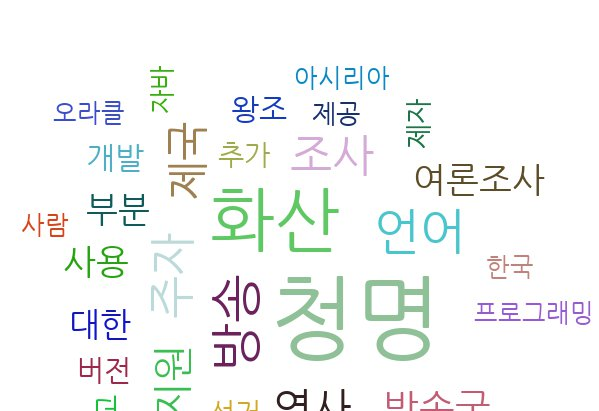

In [47]:
from IPython.display import Image
Image(filename='wordcloud.jpg')

In [52]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
from PIL import Image
import numpy as np

In [53]:
nouns_tagger = Okt()
nouns_content = nouns_tagger.nouns(content_corpus)
count_content = Counter(nouns_content)

nouns_title = nouns_tagger.nouns(title_corpus)
count_title = Counter(nouns_title)

nouns_category = nouns_tagger.nouns(category_corpus)
count_category = Counter(nouns_category)

remove_content = Counter({x: count[x] for x in count if len(x) > 1})
remove_content = Counter({x: remove_content[x] for x in count_content if x not in stopwords})
remove_title = Counter({x: count[x] for x in count if len(x) > 1})
remove_title = Counter({x: remove_title[x] for x in count_title if x not in stopwords})
remove_category = Counter({x: count[x] for x in count if len(x) > 1})
remove_category = Counter({x: remove_category[x] for x in count_category if x not in stopwords})


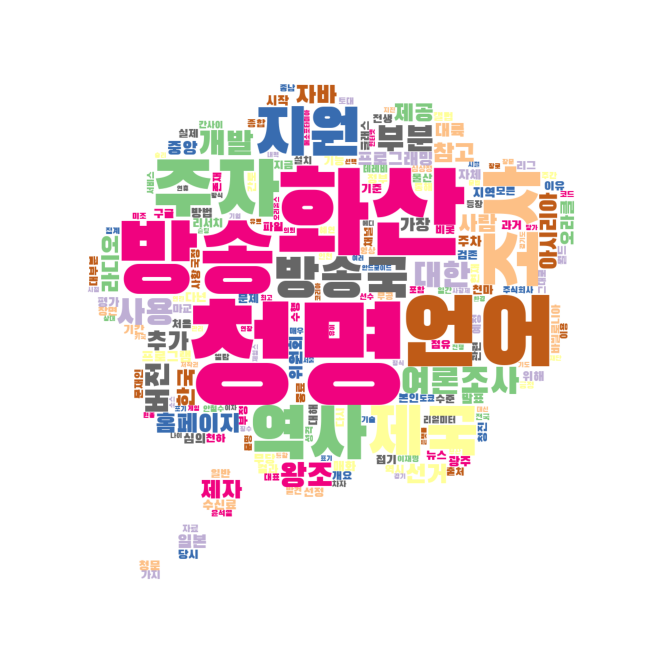

In [60]:
img = Image.open('./Data/mask2.png')
img_array = np.array(img)

wc = WordCloud(font_path='./Data/BlackHanSans-Regular.ttf', max_font_size=250, mask=img_array
              ,colormap = 'Accent',background_color = "white")
gen = wc.generate_from_frequencies(remove_char_counter)

plt.figure(figsize=(12,12))
plt.imshow(gen)
plt.axis('off')
plt.savefig('wordcloud_content.jpg')

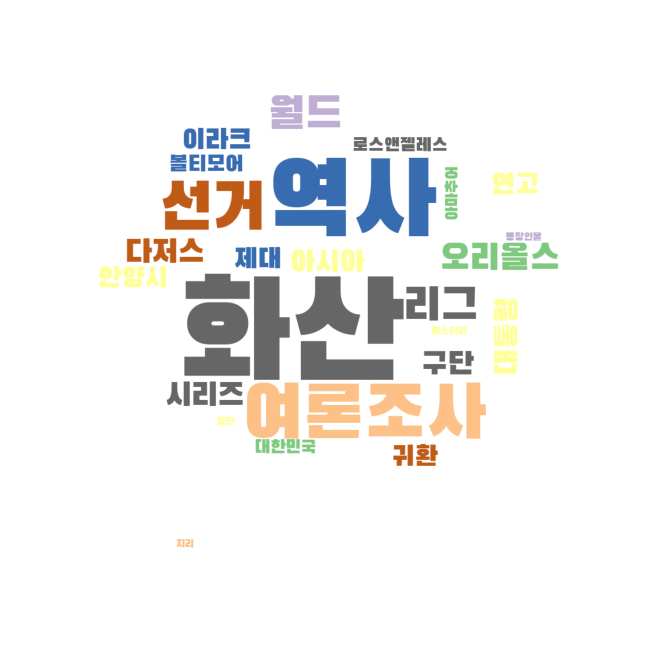

In [61]:
img = Image.open('./Data/mask2.png')
img_array = np.array(img)

wc = WordCloud(font_path='./Data/BlackHanSans-Regular.ttf', max_font_size=250, mask=img_array
              ,colormap = 'Accent',background_color = "white")
gen = wc.generate_from_frequencies(remove_category)

plt.figure(figsize=(12,12))
plt.imshow(gen)
plt.axis('off')
plt.savefig('wordcloud_category.jpg')

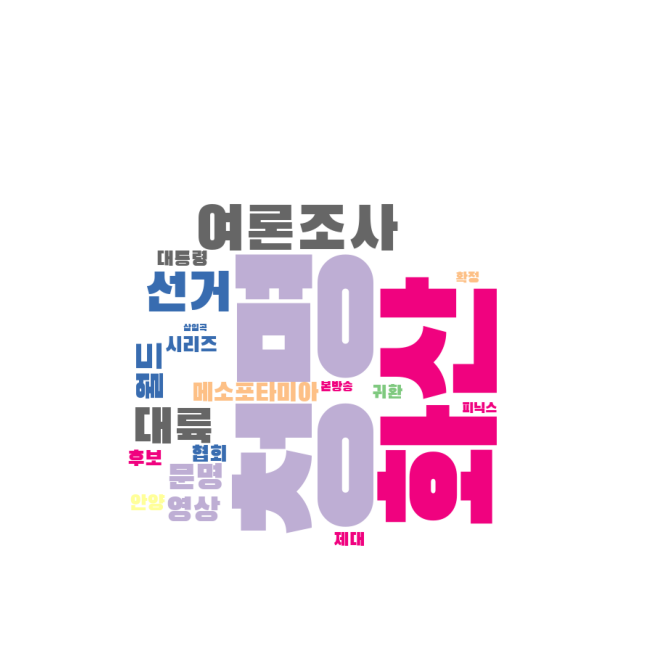

In [62]:
img = Image.open('./Data/mask1.png')
img_array = np.array(img)

wc = WordCloud(font_path='./Data/BlackHanSans-Regular.ttf', max_font_size=250, mask=img_array
              ,colormap = 'Accent',background_color = "white")
gen = wc.generate_from_frequencies(remove_title)

plt.figure(figsize=(12,12))
plt.imshow(gen)
plt.axis('off')
plt.savefig('wordcloud_title.jpg')

In [167]:
Eng = open('./Data/OFL.txt','rt', encoding='UTF-8').read()

In [168]:
EngCl = hangul_cleaning(Eng)
Eng_cloud = WordCloud().generate(EngCl)


In [169]:
EngCl

'Copyright 2015 The Black Han Sans Authors\n\nThis Font Software is licensed under the SIL Open Font License, Version 1.1.\nThis license is copied below, and is also available with a FAQ at:\nhttp://scripts.sil.org/OFL\n\n\n-----------------------------------------------------------\nSIL OPEN FONT LICENSE Version 1.1 - 26 February 2007\n-----------------------------------------------------------\n\nPREAMBLE\nThe goals of the Open Font License (OFL) are to stimulate worldwide\ndevelopment of collaborative font projects, to support the font creation\nefforts of academic and linguistic communities, and to provide a free and\nopen framework in which fonts may be shared and improved in partnership\nwith others.\n\nThe OFL allows the licensed fonts to be used, studied, modified and\nredistributed freely as long as they are not sold by themselves. The\nfonts, including any derivative works, can be bundled, embedded, \nredistributed and/or sold with any software provided that any reserved\nnam

In [170]:
Eng_cloud.words_

{'_ _': 1.0,
 'blog naver': 0.25,
 'osy2201': 0.22321428571428573,
 'EC': 0.16964285714285715,
 'Font Software': 0.14285714285714285,
 'Font': 0.13392857142857142,
 'license': 0.10714285714285714,
 's': 0.10714285714285714,
 'https': 0.09821428571428571,
 'EB': 0.09821428571428571,
 'B8': 0.09821428571428571,
 'A0': 0.09821428571428571,
 'naver': 0.0625,
 'name': 0.05357142857142857,
 'youtube': 0.05357142857142857,
 'Copyright Holder': 0.05357142857142857,
 'watch v': 0.05357142857142857,
 'co kr': 0.05357142857142857,
 'may': 0.044642857142857144,
 'derivative': 0.044642857142857144,
 'refers': 0.044642857142857144,
 'Original': 0.044642857142857144,
 'TV': 0.044642857142857144,
 'o': 0.044642857142857144,
 'EA': 0.044642857142857144,
 'X': 0.044642857142857144,
 'Modified Version': 0.044642857142857144,
 'google co': 0.044642857142857144,
 'kr maps': 0.044642857142857144,
 'Copyright': 0.03571428571428571,
 'Open': 0.03571428571428571,
 'Version': 0.03571428571428571,
 'sold': 0.035

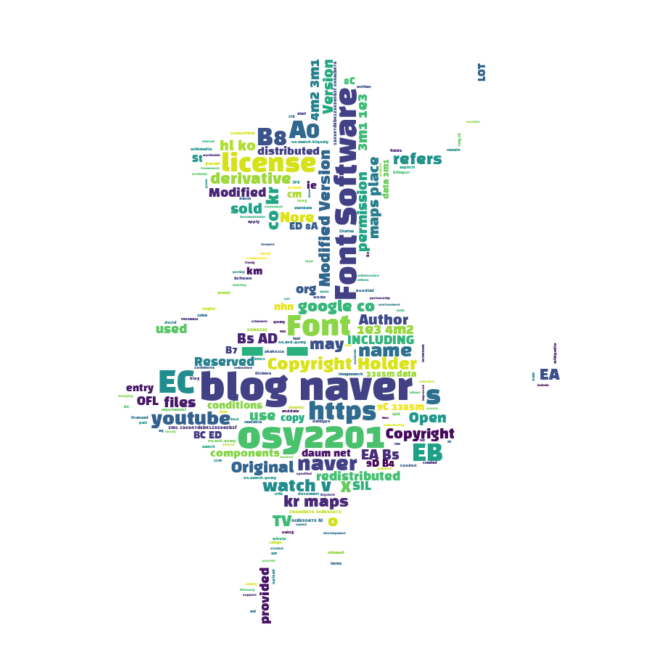

In [166]:
alice_mask = np.array(Image.open("./Data/alice_mask.png"))

Engcloud = WordCloud(mask=alice_mask, font_path='./Data/BlackHanSans-Regular.ttf', background_color = "white", max_font_size=80).generate(EngCl)
plt.figure(figsize=(12,12))
plt.imshow(Engcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


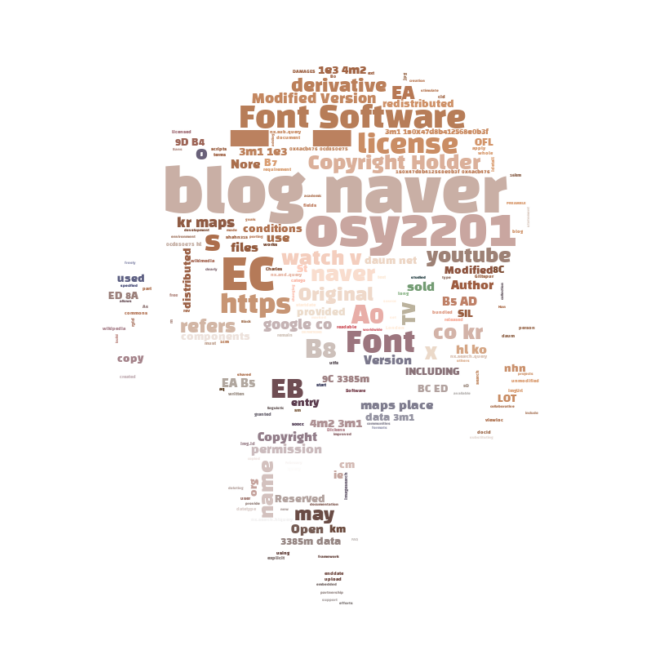

In [163]:
from wordcloud import ImageColorGenerator
coloring = np.array(Image.open("./Data/pngegg.png"))
image_colors = ImageColorGenerator(coloring)

Engcloud = WordCloud(mask=coloring, font_path='./Data/BlackHanSans-Regular.ttf', background_color = "white"
                     ,max_font_size=130).generate(EngCl)
plt.figure(figsize=(12,12))
plt.imshow(Engcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")
plt.show()

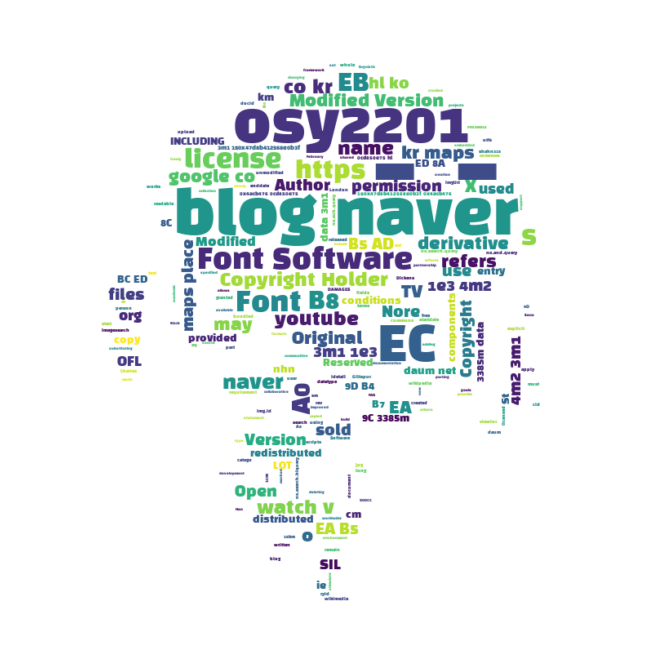

In [164]:
from wordcloud import ImageColorGenerator
coloring = np.array(Image.open("./Data/pngegg.png"))
image_colors = ImageColorGenerator(coloring)

Engcloud = WordCloud(mask=coloring, font_path='./Data/BlackHanSans-Regular.ttf', background_color = "white"
                     ,max_font_size=130).generate(EngCl)
plt.figure(figsize=(12,12))
plt.imshow(Engcloud, interpolation='bilinear')
plt.axis("off")
plt.show()